In [1]:
# Change working directory
%cd ..

d:\HUST\OT factorization\ot-kpgf


In [2]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Disable warnings
import warnings
warnings.filterwarnings('ignore')

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import json
import pandas as pd
import numpy as np
import scipy
import os
import ot
from optimal_transport.models import KeypointFOT, FOT, LOT, EMD
from optimal_transport.experiments import RhoSensitivity, EpsilonSensitivity, KeypointSensitivity, AlphaSensitivity
from typing import Tuple, Optional, List, Union, Dict

# To make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import seaborn as sns

Accuracy: {'mnist_train': 0.993, 'mnist_test': 0.9705, 'usps_train': 0.869, 'usps_test': 0.802}
[0.0% guiding] Accuracy: 0.822, Runtime: 24.883410215377808
[10.0% guiding] Accuracy: 0.8255, Runtime: 32.66116189956665
[20.0% guiding] Accuracy: 0.8315, Runtime: 35.47990894317627
[30.000000000000004% guiding] Accuracy: 0.8375, Runtime: 25.052255630493164
[40.0% guiding] Accuracy: 0.842, Runtime: 50.60775828361511
[50.0% guiding] Accuracy: 0.8485, Runtime: 39.94136333465576
[60.00000000000001% guiding] Accuracy: 0.8495, Runtime: 38.94335317611694
[70.0% guiding] Accuracy: 0.8475, Runtime: 3212.804085254669
[80.0% guiding] Accuracy: 0.8455, Runtime: 19.938636541366577
[90.0% guiding] Accuracy: 0.844, Runtime: 15.501395225524902
[100.0% guiding] Accuracy: 0.835, Runtime: 21.975022077560425


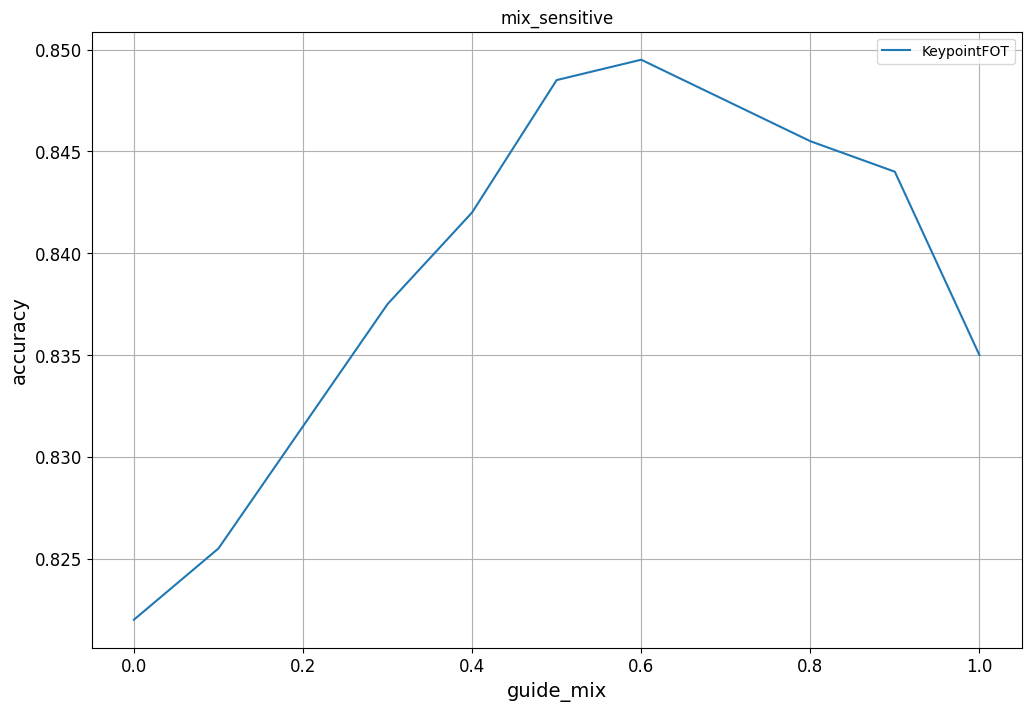

In [3]:
#@title Alpha sensitivity
n_anchors = 10
model = {
    "KeypointFOT": KeypointFOT(n_free_anchors=n_anchors, guide_mixing=0.5, stop_thr=1e-5,
                               sinkhorn_reg=0.0005, temperature=0.1, div_term=1e-20, max_iters=200),
}
experiment = AlphaSensitivity(model=model, log_dir="logs")
results = experiment(
    min_alpha=0, max_alpha=1, freq_alpha=0.1,
    keypoints_per_cls=1, n_keypoints=10
)

Accuracy: {'mnist_train': 0.993, 'mnist_test': 0.9705, 'usps_train': 0.869, 'usps_test': 0.802}
[1 keypoints] Accuracy: 0.837, Runtime: 5.939728736877441
[2 keypoints] Accuracy: 0.758, Runtime: 79.45476365089417
[3 keypoints] Accuracy: 0.829, Runtime: 24.556752920150757
[4 keypoints] Accuracy: 0.8325, Runtime: 25.81424045562744
[5 keypoints] Accuracy: 0.831, Runtime: 9.27034306526184
[6 keypoints] Accuracy: 0.8325, Runtime: 16.5998432636261
[7 keypoints] Accuracy: 0.833, Runtime: 24.916303157806396
[8 keypoints] Accuracy: 0.8405, Runtime: 15.571479558944702
[9 keypoints] Accuracy: 0.845, Runtime: 24.756447076797485
[10 keypoints] Accuracy: 0.8485, Runtime: 21.211703300476074
[11 keypoints] Accuracy: 0.851, Runtime: 16.903856992721558
[12 keypoints] Accuracy: 0.852, Runtime: 17.904152393341064
[13 keypoints] Accuracy: 0.8485, Runtime: 21.900675535202026
[14 keypoints] Accuracy: 0.848, Runtime: 36.94124388694763
[15 keypoints] Accuracy: 0.8455, Runtime: 23.048613786697388
[16 keypoints] 

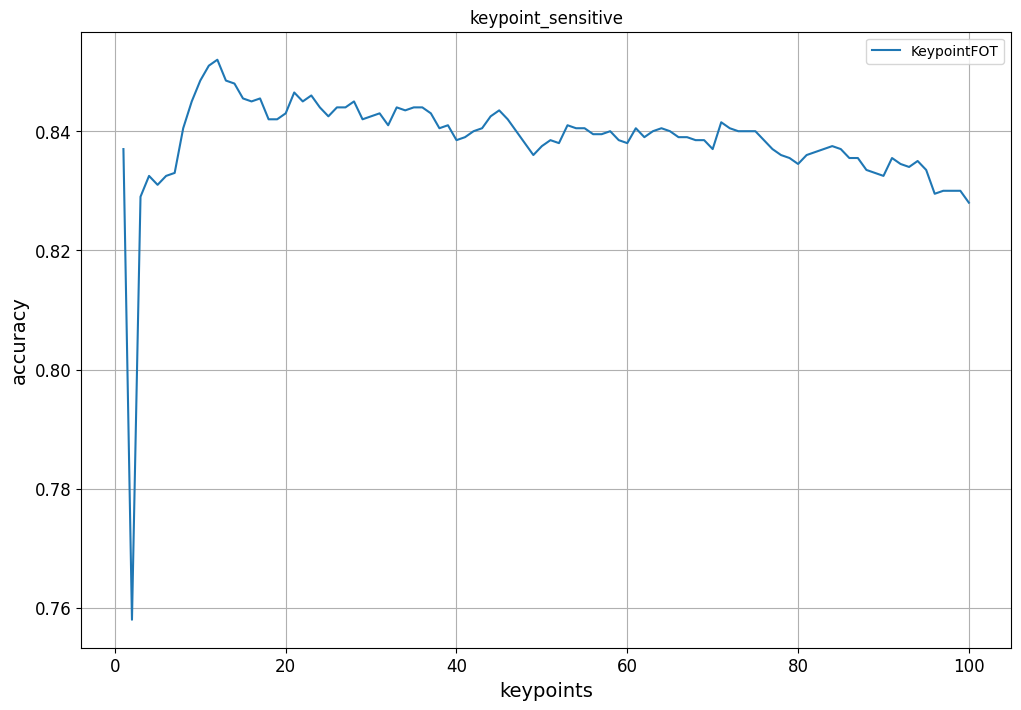

In [3]:
#@title Keypoint sensitivity
n_anchors = 10
model = {
    "KeypointFOT": KeypointFOT(n_free_anchors=n_anchors, guide_mixing=0.5, stop_thr=1e-5,
                               sinkhorn_reg=0.0005, temperature=0.1, div_term=1e-20, max_iters=200),
}
experiment = KeypointSensitivity(model=model, log_dir="logs")
results = experiment(
    min_keypoints=1, max_keypoints=None, freq_keypoints=1,
    keypoints_per_cls=10
)

Accuracy: {'mnist_train': 0.993, 'mnist_test': 0.9705, 'usps_train': 0.869, 'usps_test': 0.802}
[0.0001 entropy] Accuracy: 0.817, Runtime: 30.19437336921692
[0.0005 entropy] Accuracy: 0.8485, Runtime: 23.55004334449768
[0.001 entropy] Accuracy: 0.8305, Runtime: 10.994613647460938
[0.005 entropy] Accuracy: 0.7665, Runtime: 24.193026542663574
[0.01 entropy] Accuracy: 0.783, Runtime: 21.24357509613037
[0.05 entropy] Accuracy: 0.8415, Runtime: 40.4133563041687
[0.1 entropy] Accuracy: 0.781, Runtime: 168.8363013267517
[0.5 entropy] Accuracy: 0.826, Runtime: 26.064713716506958
[1 entropy] Accuracy: 0.826, Runtime: 10.326079845428467


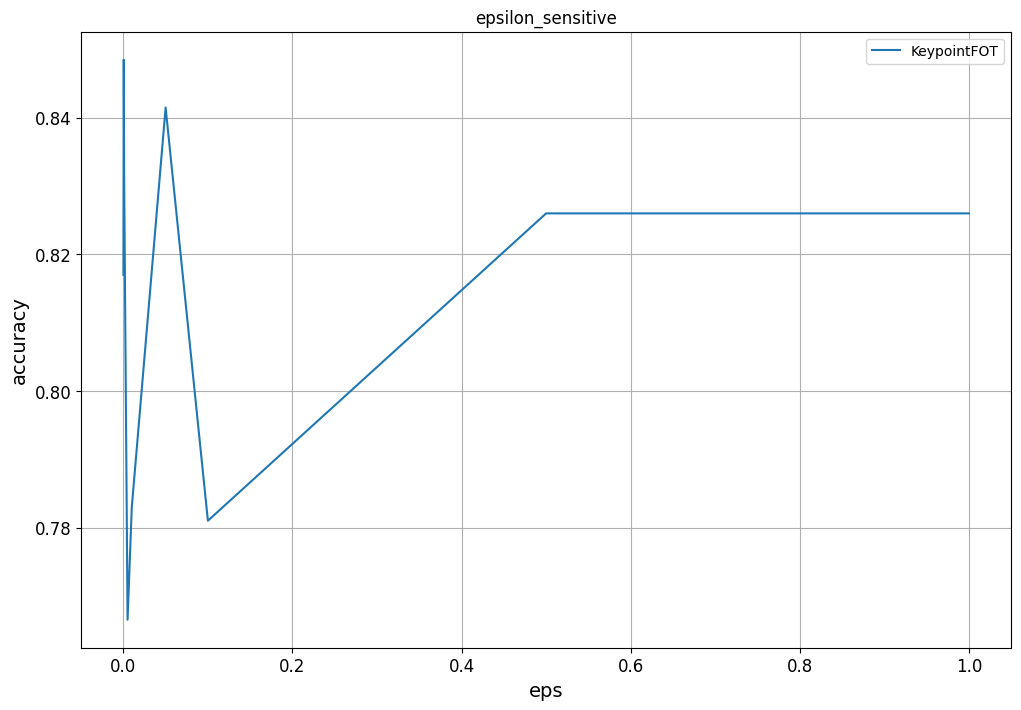

In [4]:
#@title Eps sensitivity
n_anchors = 10
model = {
    "KeypointFOT": KeypointFOT(n_free_anchors=n_anchors, guide_mixing=0.5, stop_thr=1e-5,
                               sinkhorn_reg=0.0005, temperature=0.1, div_term=1e-20, max_iters=200),
}
experiment = EpsilonSensitivity(model=model, log_dir="logs")
results = experiment(
    n_keypoints=10, keypoints_per_cls=1,
    eps_range=[0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]
)

Accuracy: {'mnist_train': 0.993, 'mnist_test': 0.9705, 'usps_train': 0.869, 'usps_test': 0.802}
[0.05 temperature] Accuracy: 0.844, Runtime: 13.32911205291748
[0.07 temperature] Accuracy: 0.842, Runtime: 33.809460401535034
[0.09 temperature] Accuracy: 0.8445, Runtime: 19.230650424957275
[0.1 temperature] Accuracy: 0.8485, Runtime: 21.17931604385376
[0.2 temperature] Accuracy: 0.8395, Runtime: 14.192719221115112
[0.3 temperature] Accuracy: 0.8395, Runtime: 17.848580360412598
[0.4 temperature] Accuracy: 0.8385, Runtime: 15.35108208656311
[0.5 temperature] Accuracy: 0.8385, Runtime: 13.643309831619263


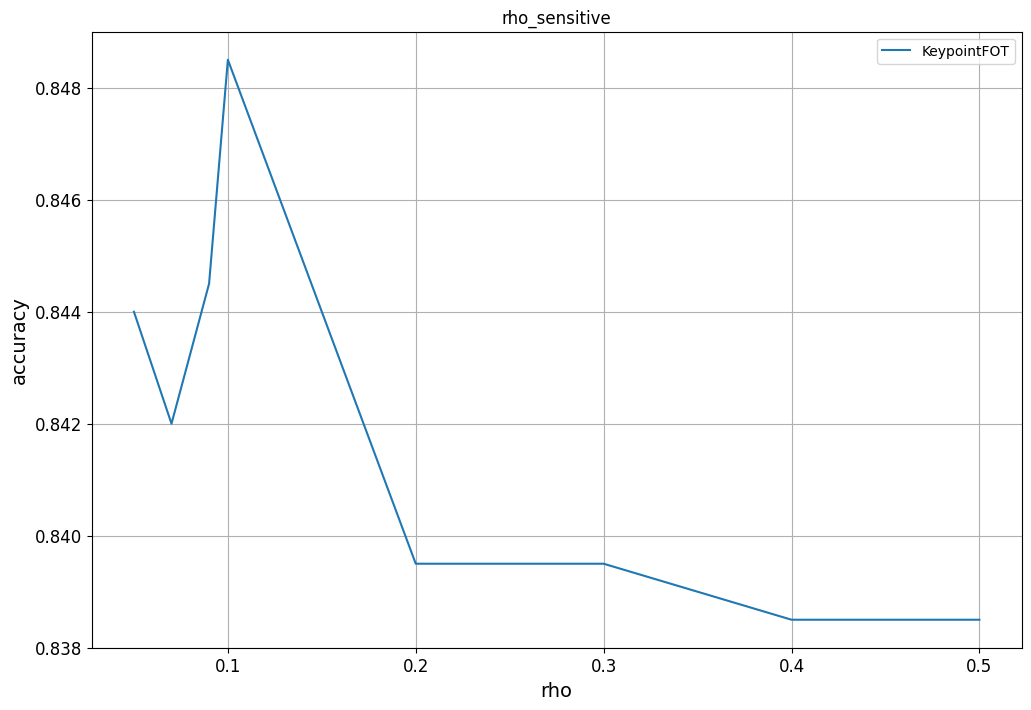

In [6]:
#@title Rho sensitivity
n_anchors = 10
model = {
    "KeypointFOT": KeypointFOT(n_free_anchors=n_anchors, guide_mixing=0.5, stop_thr=1e-5,
                               sinkhorn_reg=0.0005, temperature=0.1, div_term=1e-20, max_iters=200),
}
experiment = RhoSensitivity(model=model, log_dir="logs")
results = experiment(
    n_keypoints=10, keypoints_per_cls=1,
    rho_range=[0.05, 0.07, 0.09, 0.1, 0.2, 0.3, 0.4, 0.5]
)